<a href="https://colab.research.google.com/github/ItbaMalahat/4-way-Linked-List---CS221-A1/blob/main/2021250_CS439_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Itba Malahat |
Reg Number: 2021250 |
CS 439 Assignment 2 |
Dataset: Sample Sales Dataset |
URL: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data?resource=*download

In [10]:
import pandas as pd
from google.colab import files


**Uploading the Dataset**

In [11]:
print("Please upload your CSV file.")
uploaded = files.upload()


Please upload your CSV file.


Saving sales_data_sample.csv to sales_data_sample (2).csv


**Loading the Dataset**

In [12]:
print("Loading the dataset...")
sales_data = pd.read_csv('sales_data_sample.csv', encoding='latin1')
print("Dataset loaded successfully!")


Loading the dataset...
Dataset loaded successfully!


**Schema and First Five Rows of Dataset**

Explanation: The schema and first five rows of the dataset provide an essential overview of the data structure and sample values, offering a glimpse into the dataset's organization and content. The schema outlines the column names, data types, and the number of non-null entries for each field, which helps assess data integrity and identify potential issues, such as missing values or inconsistent data types. The first five rows display actual data points from the dataset, allowing for an initial inspection of the data's format and values, which can help verify the correctness and relevance of the data. By reviewing both the schema and a sample of the data, you can ensure the dataset is ready for analysis, modeling, or further preprocessing.


In [49]:
print("Here are the first few rows of the dataset:")
print(sales_data.head())


Here are the first few rows of the dataset:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1 

**Summary/Information of Dataset**

Explanation: The summary or information of a dataset provides a high-level overview of its structure, including the number of entries, columns, data types, and missing values. This helps in understanding the completeness and integrity of the data before performing analysis. In the context of this dataset, the summary reveals key details such as the total number of records (2823 entries), the presence of non-null and null values across different columns, and the data types (e.g., integers, floats, and objects). Additionally, it provides insights into the presence of missing or incomplete data, such as the "STATE" column, which has fewer non-null values compared to others, highlighting areas that may require data imputation or cleaning. This summary is crucial for data preprocessing and guiding further analysis or model-building steps.

In [14]:
print("\nSummary of the dataset:")
print(sales_data.info())



Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2     

**Statistical Summary of the dataset**

Explanation: The statistical summary provides an overview of the dataset's numerical attributes, offering key insights into its distribution, central tendency, and variability. It includes metrics such as the mean, median, standard deviation, minimum, and maximum values for each numeric column. This summary allows for a quick understanding of the dataset's range, typical values, and potential outliers. In this dataset, for example, you would see statistics for columns like "QUANTITYORDERED," "SALES," and "PRICEEACH," helping identify trends, anomalies, or any need for further data cleaning or transformation.

In [48]:
print("\nStatistical summary of the dataset:")
print(sales_data.describe(include='all'))



Statistical summary of the dataset:
         ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count    2823.000000      2823.000000  2823.000000      2823.000000   
unique           NaN              NaN          NaN              NaN   
top              NaN              NaN          NaN              NaN   
freq             NaN              NaN          NaN              NaN   
mean    10258.725115        35.092809    83.658544         6.466171   
std        92.085478         9.741443    20.174277         4.225841   
min     10100.000000         6.000000    26.880000         1.000000   
25%     10180.000000        27.000000    68.860000         3.000000   
50%     10262.000000        35.000000    95.700000         6.000000   
75%     10333.500000        43.000000   100.000000         9.000000   
max     10425.000000        97.000000   100.000000        18.000000   

               SALES        ORDERDATE   STATUS       QTR_ID     MONTH_ID  \
count    2823.000000             2

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


**Dot and Line Plot for Sales Trend by Month**

*   Description: This plot visualizes the sales trend over time, with each month's total sales represented by both individual data points (dots) and a connecting line. It helps identify patterns and fluctuations in sales performance month by month.





Generating dot and line plot: Sales Trend by Month...


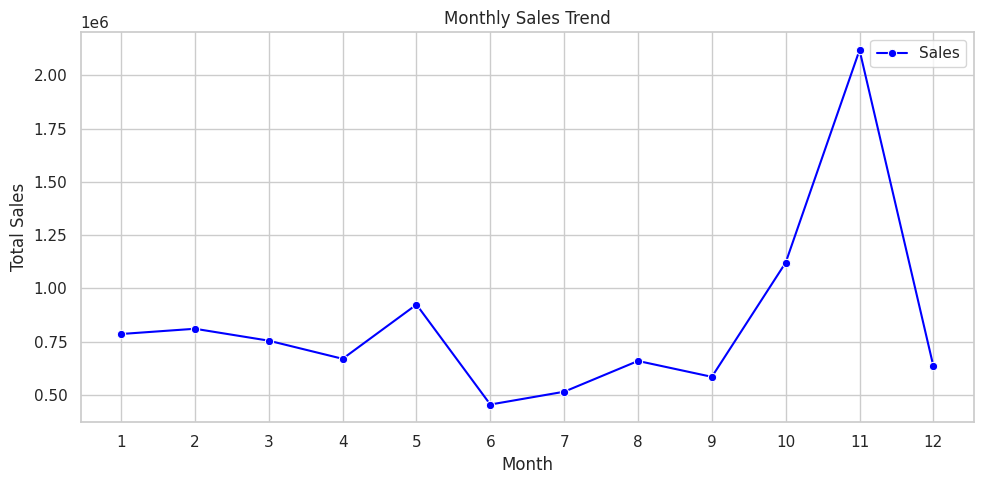

In [31]:
print("Generating dot and line plot: Sales Trend by Month...")
# Line plot for sales over months
monthly_sales = sales_data.groupby('MONTH_ID')['SALES'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='MONTH_ID', y='SALES', marker='o', color='blue', label='Sales')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.legend()
plt.tight_layout()
plt.show()


**Scatter Plot for Sales vs Quantity Ordered**

*   Explanation:This scatter plot displays the relationship between the sales amount and the quantity ordered for each transaction. It helps to visualize if there is any correlation between the number of items ordered and the total sales generated, revealing trends or outliers in the data.



Generating scatter plot: Sales vs Quantity Ordered...


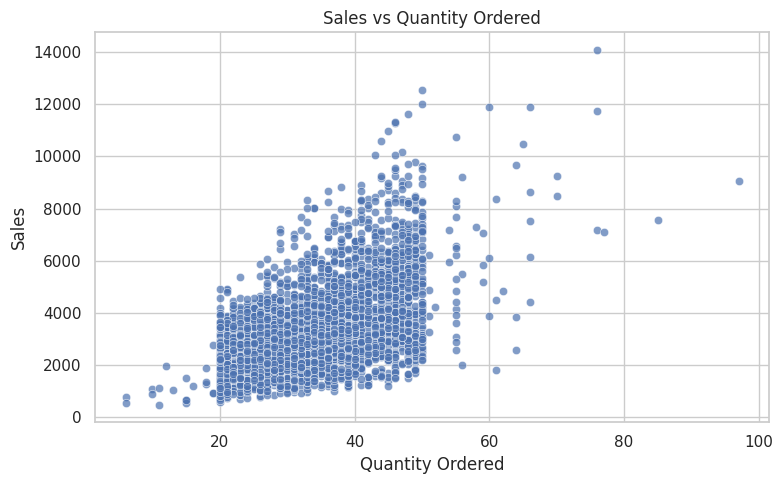

In [32]:
print("Generating scatter plot: Sales vs Quantity Ordered...")
plt.figure(figsize=(8, 5))
sns.scatterplot(data=sales_data, x='QUANTITYORDERED', y='SALES', alpha=0.7)
plt.title('Sales vs Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


**Bar Plot For Total Sales by Deal Size**

*   Explanation: This bar plot shows the total sales aggregated by deal size categories, providing a clear comparison of sales performance across different deal sizes. It allows for easy identification of which deal sizes contribute the most to overall sales and highlights any significant differences in sales volume among various deal sizes.



Generating bar plot: Total Sales by Deal Size...


<ipython-input-33-112703f531c1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=sales_data, x='DEALSIZE', y='SALES', estimator=sum, ci=None, palette='muted')
<ipython-input-33-112703f531c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_data, x='DEALSIZE', y='SALES', estimator=sum, ci=None, palette='muted')


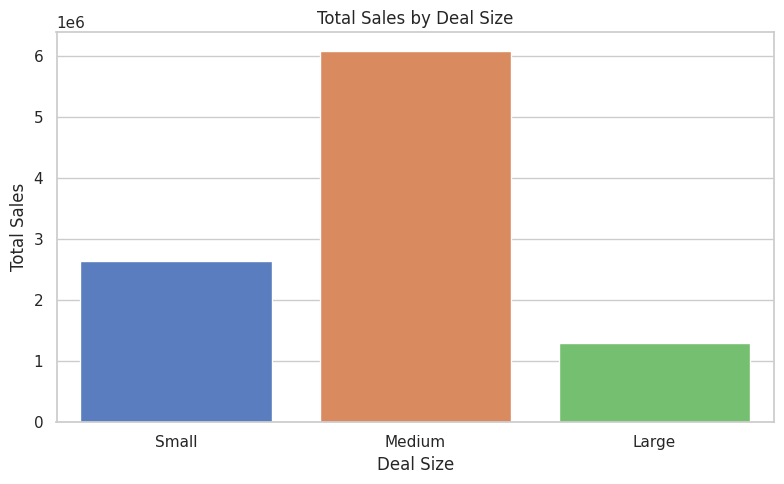

In [33]:
print("Generating bar plot: Total Sales by Deal Size...")
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_data, x='DEALSIZE', y='SALES', estimator=sum, ci=None, palette='muted')
plt.title('Total Sales by Deal Size')
plt.ylabel('Total Sales')
plt.xlabel('Deal Size')
plt.tight_layout()
plt.show()


**Pie Chart for Deal Size Distribution**

*   Explanation: This pie chart visualizes the proportion of total sales attributed to each deal size category. It helps to understand the relative frequency of each deal size within the dataset, showcasing how sales are distributed across the different deal sizes. The chart provides a quick and clear overview of the sales landscape based on deal size, highlighting the dominant deal sizes and any less common ones.


Generating pie chart: Deal Size Distribution...


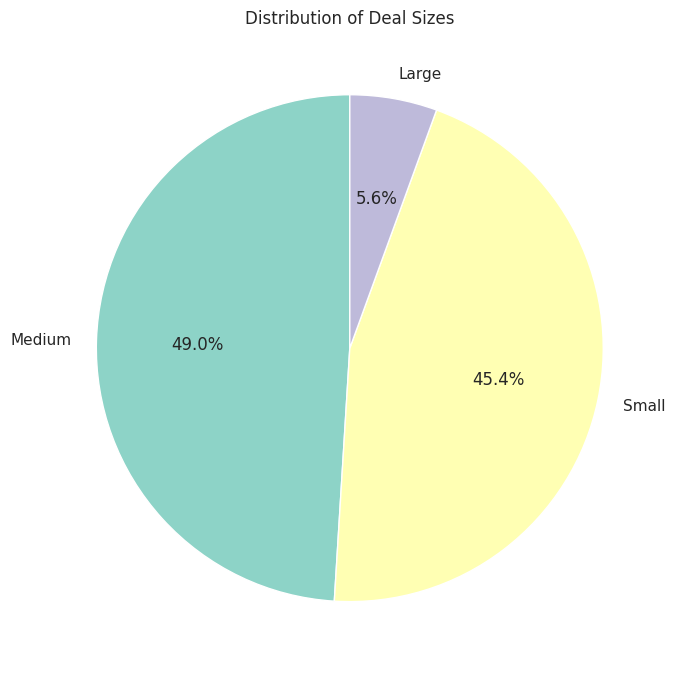

In [34]:
print("Generating pie chart: Deal Size Distribution...")
deal_size_counts = sales_data['DEALSIZE'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(deal_size_counts, labels=deal_size_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Distribution of Deal Sizes')
plt.tight_layout()
plt.show()


**Histogram for Distribution**

Explanation: The histogram displays the distribution of a specific numerical variable, such as sales or quantity ordered, by grouping the data into bins or intervals. It helps to visualize the frequency of data points within these bins, allowing you to identify patterns, such as the central tendency, spread, and any skewness in the dataset. The histogram provides insights into the distribution shape, such as whether the data is normally distributed, skewed, or has multiple peaks

Generating histogram: Distribution of Sales...


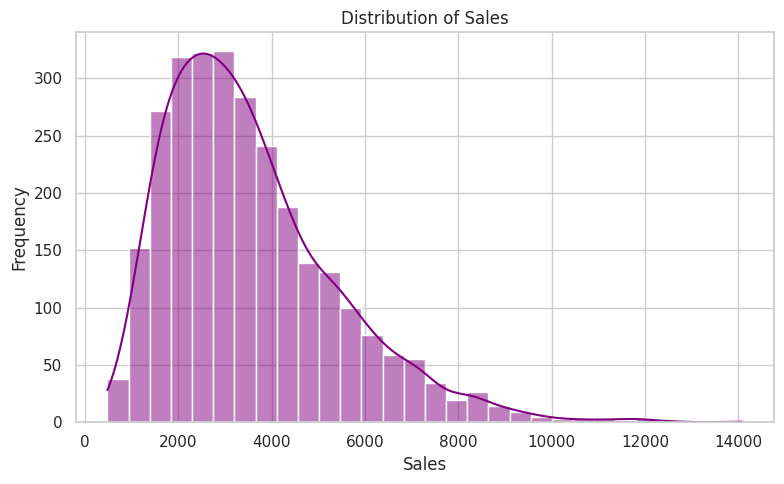

In [35]:
print("Generating histogram: Distribution of Sales...")
plt.figure(figsize=(8, 5))
sns.histplot(data=sales_data, x='SALES', bins=30, kde=True, color='purple')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Data Map**


*   Explanation: A data map visually represents the structure and relationships between different elements in a dataset. It helps to clarify the connections between various columns, their data types, and the kind of values they hold. This visual tool can aid in understanding how different variables interact, where missing or incomplete data might reside, and how they can be used for analysis. In the context of this dataset, a data map would show the columns such as "ORDERNUMBER", "SALES", "CITY", and "PRODUCTLINE" and highlight the relationships between these fields, enabling better decision-making and insights into the dataset.




In [37]:
!pip install geopy


In [47]:
import pandas as pd

# Example data (replace with your actual dataset)
data_map = {
    'ORDERNUMBER': {
        'description': 'Unique identifier for each order.',
        'data_type': 'Integer',
        'notes': 'Primary key for orders.'
    },
    'QUANTITYORDERED': {
        'description': 'The number of units ordered in the transaction.',
        'data_type': 'Integer',
        'notes': 'Positive integer.'
    },
    'PRICEEACH': {
        'description': 'The price of each individual product ordered.',
        'data_type': 'Float',
        'notes': 'Price per unit in the currency of the transaction.'
    },
    'ORDERLINENUMBER': {
        'description': 'Line item identifier for each order; represents each product in the order.',
        'data_type': 'Integer',
        'notes': 'A unique identifier within each order.'
    },
    'SALES': {
        'description': 'The total sales value for the line item (Quantity Ordered * Price Each).',
        'data_type': 'Float',
        'notes': 'Reflects the total sales for that product in the order.'
    },
    'ORDERDATE': {
        'description': 'Date when the order was placed.',
        'data_type': 'Date',
        'notes': 'Typically in `YYYY-MM-DD` format.'
    },
    'STATUS': {
        'description': 'The current status of the order (e.g., "Shipped", "Pending", "Cancelled").',
        'data_type': 'Categorical',
        'notes': 'Can be used for analyzing order fulfillment trends.'
    },
    'QTR_ID': {
        'description': 'The quarter of the year when the order was placed (1-4).',
        'data_type': 'Integer',
        'notes': 'Represents the fiscal quarter.'
    },
    'MONTH_ID': {
        'description': 'The month when the order was placed (1-12).',
        'data_type': 'Integer',
        'notes': 'Helps in month-wise analysis.'
    },
    'YEAR_ID': {
        'description': 'The year when the order was placed.',
        'data_type': 'Integer',
        'notes': 'Useful for yearly trends and comparisons.'
    },
    'PRODUCTLINE': {
        'description': 'Category of the product (e.g., "Computers", "Office Supplies").',
        'data_type': 'Categorical',
        'notes': 'Defines the broader category to which the product belongs.'
    },
    'MSRP': {
        'description': 'Manufacturer’s Suggested Retail Price (for the product).',
        'data_type': 'Float',
        'notes': 'Price recommended by the manufacturer.'
    },
    'PRODUCTCODE': {
        'description': 'Unique identifier for the product being ordered.',
        'data_type': 'String',
        'notes': 'Each product has a unique product code.'
    },
    'CUSTOMERNAME': {
        'description': 'Full name of the customer placing the order.',
        'data_type': 'String',
        'notes': 'Helps identify customer demographics.'
    },
    'PHONE': {
        'description': 'Contact phone number for the customer.',
        'data_type': 'String',
        'notes': 'Typically includes country and area code.'
    },
    'ADDRESSLINE1': {
        'description': 'Primary address line for the customer’s delivery location.',
        'data_type': 'String',
        'notes': 'Street address, building name, etc.'
    },
    'ADDRESSLINE2': {
        'description': 'Secondary address line for the customer’s delivery location (optional).',
        'data_type': 'String',
        'notes': 'Usually an apartment number, suite, etc.'
    },
    'CITY': {
        'description': 'City where the customer resides.',
        'data_type': 'String',
        'notes': 'Can be used for geographic analysis.'
    },
    'STATE': {
        'description': 'State or province where the customer resides.',
        'data_type': 'String',
        'notes': 'Helps to analyze regional trends.'
    },
    'POSTALCODE': {
        'description': 'Postal code for the customer\'s address.',
        'data_type': 'String',
        'notes': 'Important for geographic segmentation.'
    },
    'COUNTRY': {
        'description': 'Country of the customer.',
        'data_type': 'String',
        'notes': 'Can help in international trend analysis.'
    },
    'TERRITORY': {
        'description': 'The sales territory associated with the order.',
        'data_type': 'String',
        'notes': 'Sales data could be segmented by territory.'
    },
    'CONTACTLASTNAME': {
        'description': 'Last name of the sales contact for the customer.',
        'data_type': 'String',
        'notes': 'Identifies the sales representative handling the customer.'
    },
    'CONTACTFIRSTNAME': {
        'description': 'First name of the sales contact for the customer.',
        'data_type': 'String',
        'notes': 'Often used alongside `CONTACTLASTNAME`.'
    },
    'DEALSIZE': {
        'description': 'The size of the deal (e.g., "Small", "Medium", "Large").',
        'data_type': 'Categorical',
        'notes': 'Could represent the overall value or complexity of the order.'
    }
}

# Printing the data map
for column, details in data_map.items():
    print(f"Field: {column}")
    for key, value in details.items():
        print(f"  {key}: {value}")
    print()


Field: ORDERNUMBER
  description: Unique identifier for each order.
  data_type: Integer
  notes: Primary key for orders.

Field: QUANTITYORDERED
  description: The number of units ordered in the transaction.
  data_type: Integer
  notes: Positive integer.

Field: PRICEEACH
  description: The price of each individual product ordered.
  data_type: Float
  notes: Price per unit in the currency of the transaction.

Field: ORDERLINENUMBER
  description: Line item identifier for each order; represents each product in the order.
  data_type: Integer
  notes: A unique identifier within each order.

Field: SALES
  description: The total sales value for the line item (Quantity Ordered * Price Each).
  data_type: Float
  notes: Reflects the total sales for that product in the order.

Field: ORDERDATE
  description: Date when the order was placed.
  data_type: Date
  notes: Typically in `YYYY-MM-DD` format.

Field: STATUS
  description: The current status of the order (e.g., "Shipped", "Pending",